In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
titanic.shape

(418, 12)

In [44]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
print(titanic["Age"].isna().sum())


86


In [46]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic["Fare"].fillna(titanic["Fare"].mean(), inplace=True)
print(titanic["Age"].isna().sum())
print(titanic["Fare"].isna().sum())

0
0


In [47]:
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
titanic=titanic[selected_columns]

In [48]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [49]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [50]:
titanic["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x132c776d420>,
 [Text(0, 0, 'not survived'), Text(1, 0, 'survived')])

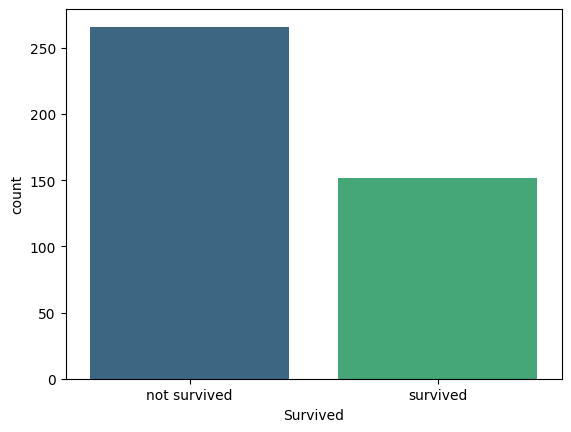

In [51]:
order = ["0", "1"]
xticklabels = ['not survived', 'survived']

sbn.countplot(x='Survived', data=titanic, order=order, palette='viridis')
plt.xticks(ticks=range(len(order)), labels=xticklabels) 

In [52]:
titanic["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

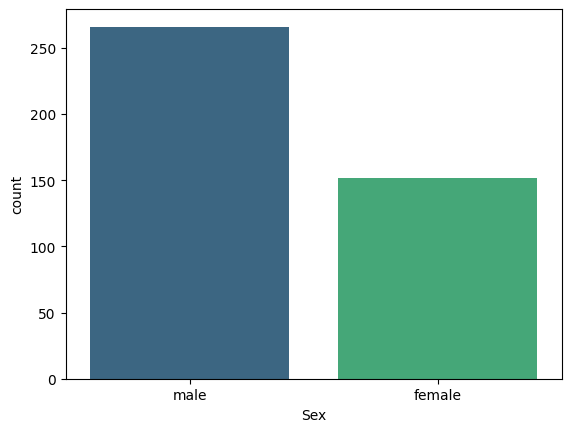

In [53]:
sbn.countplot(x="Sex", data=titanic, palette="viridis")

<Axes: xlabel='Survived', ylabel='Sex'>

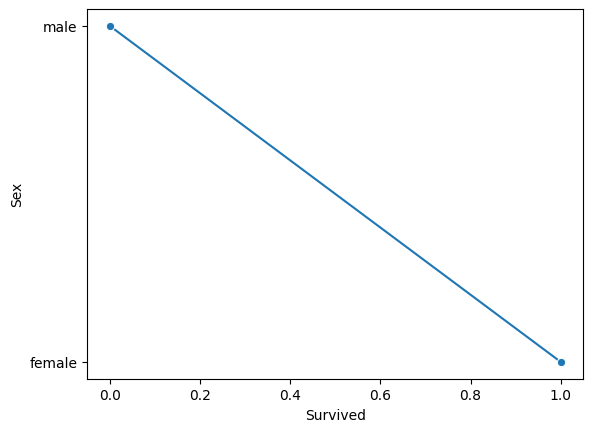

In [54]:
sbn.lineplot(x="Survived", y="Sex", data=titanic, marker='o')

<Axes: xlabel='Sex', ylabel='percent'>

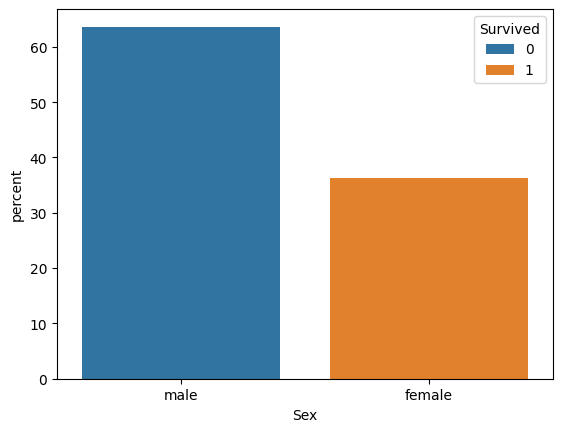

In [55]:
sbn.countplot(titanic, x="Sex", hue="Survived", stat="percent")

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Sex_mapping = {"female" : 0, "male" : 1}
Embarked_mapping = {"S": -1, "C": -2, "Q": -3}

titanic["Sex"]=titanic["Sex"].map(Sex_mapping)
titanic["Embarked"]=titanic["Embarked"].map(Embarked_mapping)

In [58]:
x = titanic.drop(columns=["Survived"])
y = titanic["Survived"]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [60]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,3,0,23.0,0,0,8.6625,-1
284,3,0,2.0,1,1,20.2125,-1
40,3,1,39.0,0,1,13.4167,-2
17,3,1,21.0,0,0,7.2250,-2
362,2,0,31.0,0,0,21.0000,-1


In [61]:
x_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [62]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (334, 7)
x_test:  (84, 7)
y_train:  (334,)
y_test:  (84,)


In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
model.fit(x_train,y_train)

C:\Users\swapn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
prediction = model.predict(x_train)
prediction

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, prediction)
accuracy

1.0

In [67]:
prediction = model.predict(x_test)
accuracy_score(y_test, prediction)

1.0

In [68]:
def predict(input_values):
    prediction = model.predict(input_values)
    prediction = np.round(prediction).astype(int)[0]

    if prediction==0:
        person="Dead"
    elif prediction==1:
        person="Survived"

    return person

(3,	1	,34.5,	0,  0	,7.8292	,-3)	-> dead </br>
(3,	0	,47.0,  1,	0   ,7.0000	,-1)	-> survived

In [69]:
input_values1 = np.array([[3,1,34.5,0,0,7.8292,-3]])
input_values2 = np.array([[3,0,47.0,1,0,7.0000,-1]])

person1=predict(input_values1)
person2=predict(input_values2)

print("person1: ",person1, "\nperson2: ",person2)

person1:  Dead 
person2:  Survived


C:\Users\swapn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\swapn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
